In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv(r"C:\Users\veda.nair\Desktop\Documents\Linear regression model-house price\house-prices-advanced-regression-techniques\house_prices_train.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X = df_train[['GrLivArea', 'GarageArea','TotalBsmtSF','1stFlrSF']]
y = df_train['SalePrice']

In [5]:
X.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF
0,1710,548,856,856
1,1262,460,1262,1262
2,1786,608,920,920
3,1717,642,756,961
4,2198,836,1145,1145


In [6]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [10]:
poly_features = polynomial_converter.fit_transform(X)

In [11]:
poly_features.shape

(1460, 14)

In [12]:
X.shape

(1460, 4)

In [13]:
X.iloc[0]

GrLivArea      1710
GarageArea      548
TotalBsmtSF     856
1stFlrSF        856
Name: 0, dtype: int64

In [14]:
poly_features[0]

array([1.71000e+03, 5.48000e+02, 8.56000e+02, 8.56000e+02, 2.92410e+06,
       9.37080e+05, 1.46376e+06, 1.46376e+06, 3.00304e+05, 4.69088e+05,
       4.69088e+05, 7.32736e+05, 7.32736e+05, 7.32736e+05])

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression(fit_intercept=True)

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
test_predictions=model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
MAE=mean_absolute_error(y_test,test_predictions)

In [26]:
MSE=mean_squared_error(y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [27]:
MAE

29479.34816642202

In [28]:
RMSE

69731.272239654

In [30]:
df_train['SalePrice'].mean()

180921.19589041095

In [31]:
train_rmse_error=[]
test_rmse_error=[]

for d in range (1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_predictions=model.predict(X_train)
    test_predictions=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

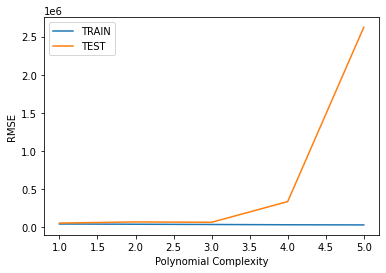

In [33]:
plt.plot(range(1,6),train_rmse_error[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_error[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [34]:
final_poly_conv=PolynomialFeatures(degree=3,include_bias=False)

In [35]:
final_model=LinearRegression()

In [36]:
final_model.fit(final_poly_conv.fit_transform(X),y)

LinearRegression()

In [37]:
from joblib import dump, load

In [38]:
dump(final_model, 'saleprice_poly_model.joblib')

['saleprice_poly_model.joblib']

In [40]:
dump(final_poly_conv,'poly_converter.joblib')

['poly_converter.joblib']

In [42]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('saleprice_poly_model.joblib')

In [43]:
test_value=[[896,730,882,896]]

In [44]:
test_poly = loaded_poly.transform(test_value)

C:\Users\veda.nair\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [45]:
test_poly

array([[8.96000000e+02, 7.30000000e+02, 8.82000000e+02, 8.96000000e+02,
        8.02816000e+05, 6.54080000e+05, 7.90272000e+05, 8.02816000e+05,
        5.32900000e+05, 6.43860000e+05, 6.54080000e+05, 7.77924000e+05,
        7.90272000e+05, 8.02816000e+05, 7.19323136e+08, 5.86055680e+08,
        7.08083712e+08, 7.19323136e+08, 4.77478400e+08, 5.76898560e+08,
        5.86055680e+08, 6.97019904e+08, 7.08083712e+08, 7.19323136e+08,
        3.89017000e+08, 4.70017800e+08, 4.77478400e+08, 5.67884520e+08,
        5.76898560e+08, 5.86055680e+08, 6.86128968e+08, 6.97019904e+08,
        7.08083712e+08, 7.19323136e+08]])

In [46]:
final_model.predict(test_poly)

array([130526.06170126])